In [13]:
import pandas as pd
import numpy as np

In [7]:
from datasets import load_dataset

df_train = load_dataset("mrseba/currency_data_project")

Found cached dataset csv (C:/Users/user/.cache/huggingface/datasets/mrseba___csv/mrseba--currency_data_project-586b00842b7dc00b/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df_train

DatasetDict({
    train: Dataset({
        features: ['Date', 'EUR', 'RON', 'RUB', 'UAH', 'USD'],
        num_rows: 1003
    })
})

In [9]:
df = df_train['train'].to_pandas()

In [10]:
df

,Date,EUR,RON,RUB,UAH,USD
0,2021-01-01,21.1266,4.3340,0.2312,0.6075,17.2146
1,2021-01-02,21.1266,4.3340,0.2312,0.6075,17.2146
2,2021-01-03,21.1266,4.3340,0.2312,0.6075,17.2146
3,2021-01-04,21.0998,4.3345,0.2298,0.6067,17.1913
4,2021-01-05,21.1326,4.3398,0.2341,0.6044,17.1886
...,...,...,...,...,...,...
998,2023-09-26,19.3622,3.8980,0.1894,0.4929,18.2026
999,2023-09-27,19.2489,3.8734,0.1888,0.4919,18.1679
1000,2023-09-28,19.1542,3.8502,0.1876,0.4914,18.1471
1001,2023-09-29,19.1338,3.8458,0.1871,0.4916,18.1553


In [18]:
df.describe()

,EUR,RON,RUB,UAH,USD
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,20.235515,4.105428,0.251088,0.583329,18.277175
std,0.720689,0.154855,0.042800,0.070709,0.678374
min,18.716200,3.782500,0.131900,0.474100,17.188600
25%,19.740850,4.003200,0.230500,0.513800,17.732150
50%,20.164300,4.080800,0.240800,0.617200,18.011000
75%,20.748700,4.207000,0.272300,0.649100,18.974400
max,21.690200,4.402400,0.362800,0.673800,19.598400


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1003 non-null   object 
 1   EUR     1003 non-null   float64
 2   RON     1003 non-null   float64
 3   RUB     1003 non-null   float64
 4   UAH     1003 non-null   float64
 5   USD     1003 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.1+ KB


In [35]:
df_base = df.copy()

In [36]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1003 non-null   object 
 1   EUR     1003 non-null   float64
 2   RON     1003 non-null   float64
 3   RUB     1003 non-null   float64
 4   UAH     1003 non-null   float64
 5   USD     1003 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.1+ KB


In [37]:
df['Date'] = pd.to_datetime(df['Date'])

df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1003 non-null   object 
 1   EUR     1003 non-null   float64
 2   RON     1003 non-null   float64
 3   RUB     1003 non-null   float64
 4   UAH     1003 non-null   float64
 5   USD     1003 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.1+ KB


In [38]:
df

,Date,EUR,RON,RUB,UAH,USD
0,2021-01-01,21.1266,4.3340,0.2312,0.6075,17.2146
1,2021-01-02,21.1266,4.3340,0.2312,0.6075,17.2146
2,2021-01-03,21.1266,4.3340,0.2312,0.6075,17.2146
3,2021-01-04,21.0998,4.3345,0.2298,0.6067,17.1913
4,2021-01-05,21.1326,4.3398,0.2341,0.6044,17.1886
...,...,...,...,...,...,...
998,2023-09-26,19.3622,3.8980,0.1894,0.4929,18.2026
999,2023-09-27,19.2489,3.8734,0.1888,0.4919,18.1679
1000,2023-09-28,19.1542,3.8502,0.1876,0.4914,18.1471
1001,2023-09-29,19.1338,3.8458,0.1871,0.4916,18.1553


### data analysis

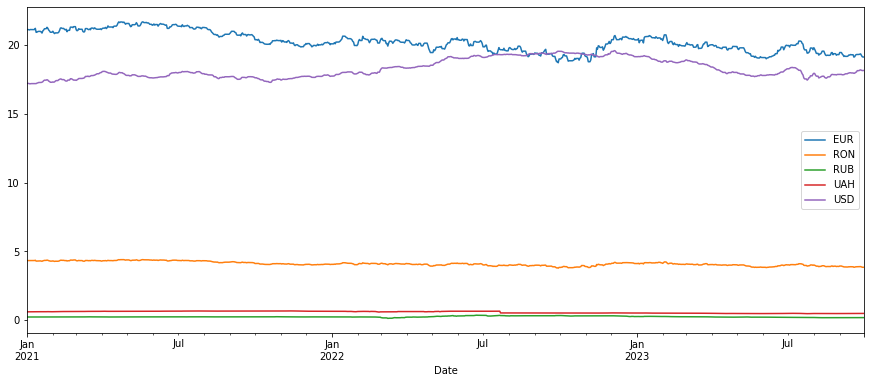

In [39]:
import matplotlib.pyplot as plt
df.set_index('Date').plot(figsize=(15, 6))
plt.show()

In [40]:
# set date as the index
df.set_index('Date', inplace=True)

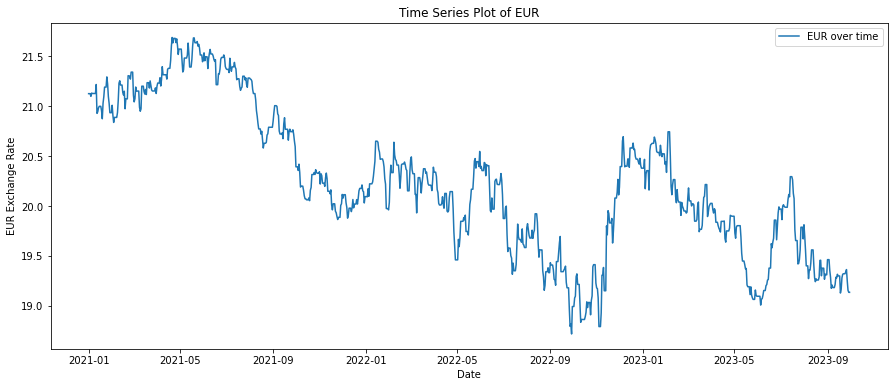

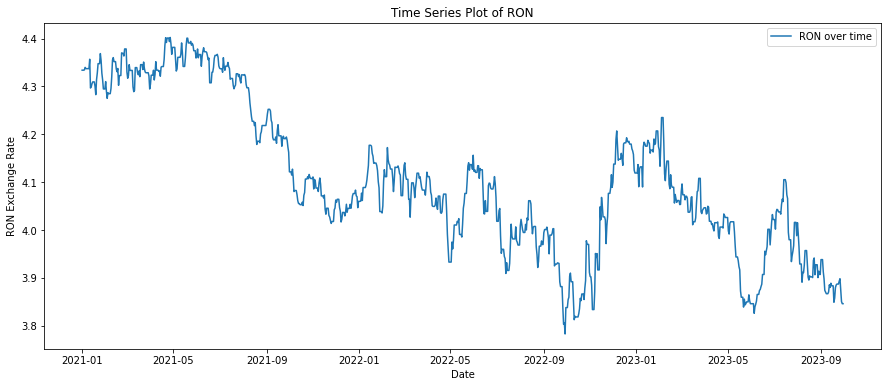

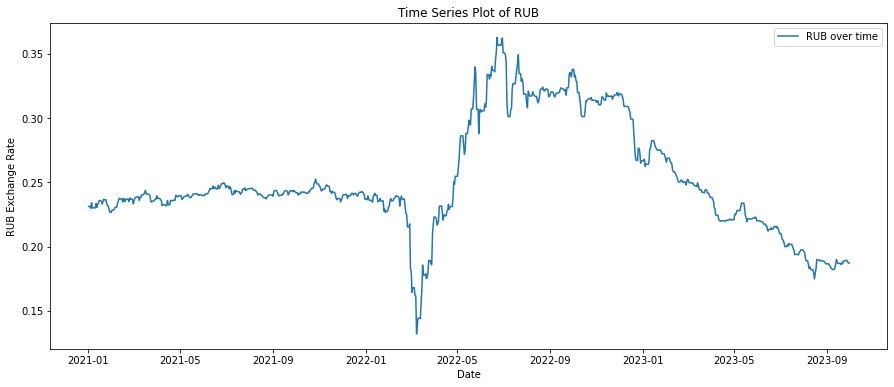

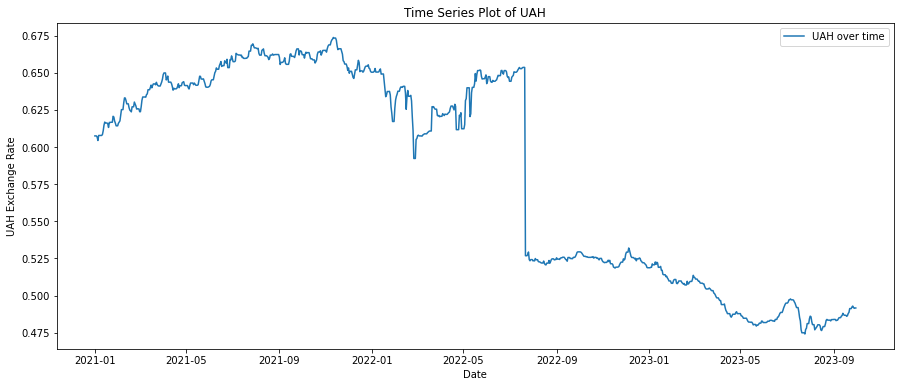

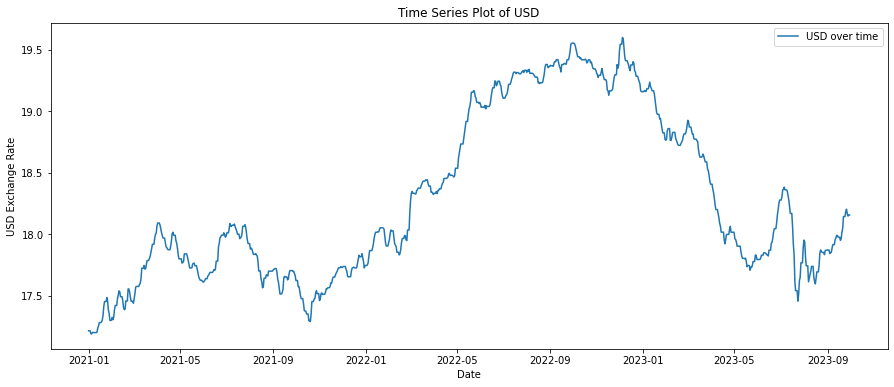

In [41]:
currency_columns = ['EUR', 'RON', 'RUB', 'UAH', 'USD']

# Loop through the list and plot time series for each currency
for currency in currency_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[currency], label=f'{currency} over time')
    plt.title(f'Time Series Plot of {currency}')
    plt.xlabel('Date')
    plt.ylabel(f'{currency} Exchange Rate')
    plt.legend()
    plt.show()

### models creation

In [54]:
!pip install numpy pandas scikit-learn statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Currency: EUR
ARIMA
MAE: 0.10559584666251531
MSE: 0.016140765637252415
R^2: -1.234034115961519
----------------------------------------------------
LinearRegression
MAE: 0.3637402439886134
MSE: 0.20020083589916243
R^2: 0.6141634713286608


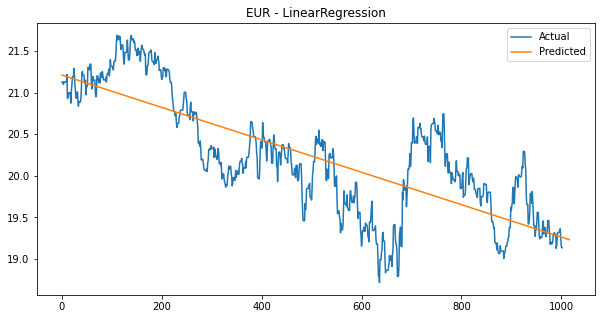

----------------------------------------------------
SVR
MAE: 0.2522811666763498
MSE: 0.10697069947540966
R^2: 0.7938410038611143


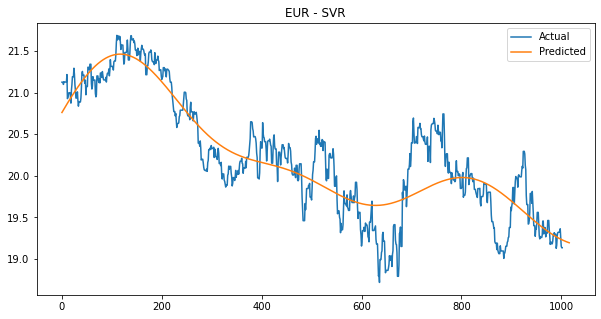

----------------------------------------------------
RandomForest
MAE: 0.017368669990030665
MSE: 0.0006784252959940195
R^2: 0.998692506652165


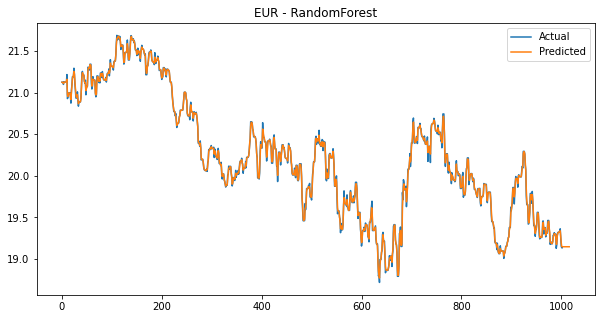

----------------------------------------------------
GradientBoosting
MAE: 0.06889049239379803
MSE: 0.008624724991585977
R^2: 0.983378021692304


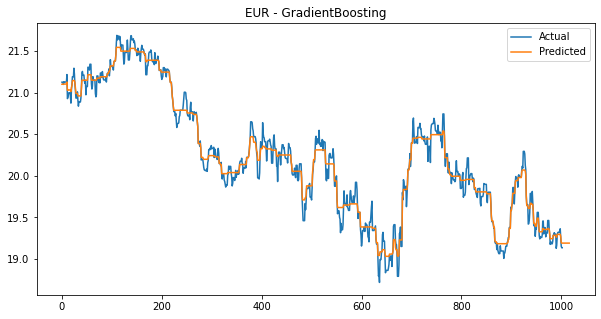

----------------------------------------------------
Currency: RON
ARIMA
MAE: 0.023570006013620897
MSE: 0.0007899078467332863
R^2: -1.3469903047217753
----------------------------------------------------
LinearRegression
MAE: 0.0782938042243112
MSE: 0.008948594273883103
R^2: 0.6264588143202154


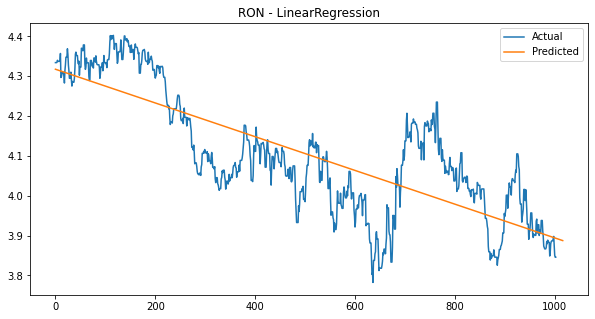

----------------------------------------------------
SVR
MAE: 0.0555054265108151
MSE: 0.004787058692559102
R^2: 0.8001738010230179


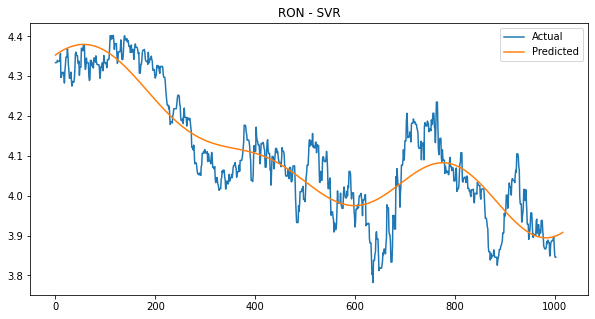

----------------------------------------------------
RandomForest
MAE: 0.0036074247258221647
MSE: 3.0111147478560587e-05
R^2: 0.9987430703206484


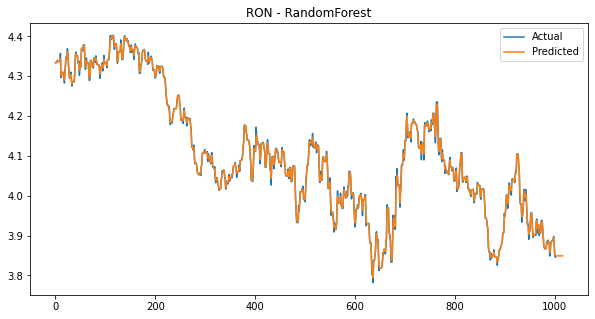

----------------------------------------------------
GradientBoosting
MAE: 0.01454562368754778
MSE: 0.0003963330058606185
R^2: 0.9834558706762145


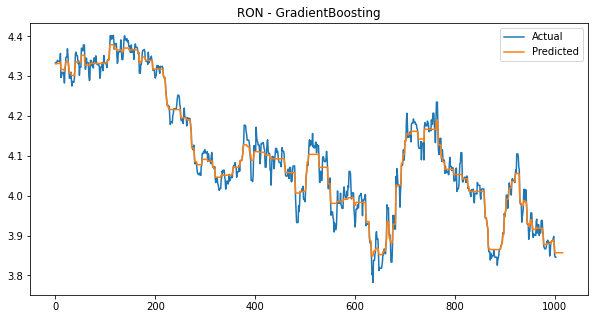

----------------------------------------------------
Currency: RUB
ARIMA
MAE: 0.0010171701690546073
MSE: 1.6851210718309409e-06
R^2: -0.4547380641246652
----------------------------------------------------
LinearRegression
MAE: 0.03306645710025364
MSE: 0.001829948680305966
R^2: 2.1874448523862e-05


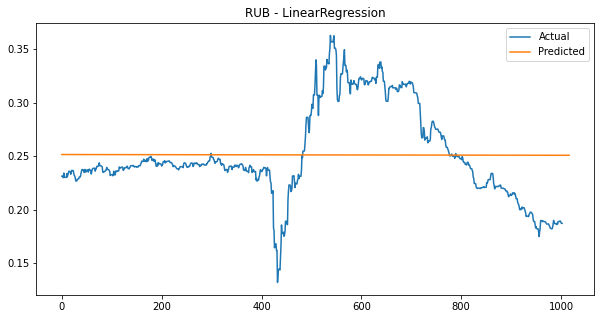

----------------------------------------------------
SVR
MAE: 0.03359292574777131
MSE: 0.0015661964442083346
R^2: 0.14414966857815026


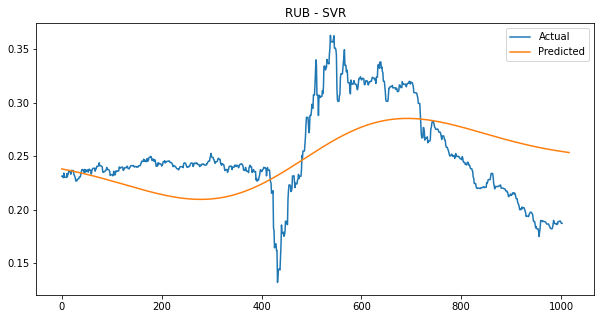

----------------------------------------------------
RandomForest
MAE: 0.0005219780658025885
MSE: 1.0602242432701743e-06
R^2: 0.9994206389158016


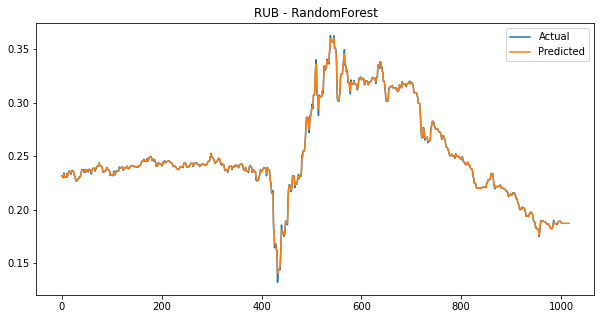

----------------------------------------------------
GradientBoosting
MAE: 0.0018685019143191304
MSE: 9.569914466505982e-06
R^2: 0.9947705062809168


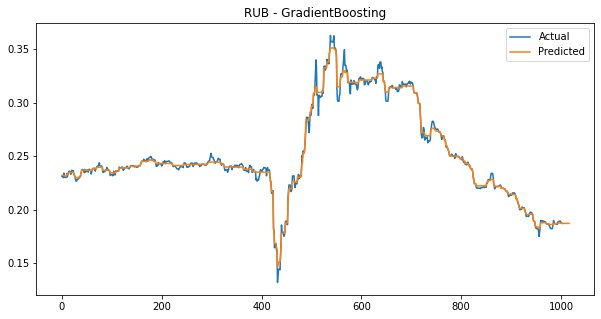

----------------------------------------------------
Currency: UAH
ARIMA
MAE: 0.0018828586553398371
MSE: 7.8073145516464e-06
R^2: -0.4598540866073497
----------------------------------------------------
LinearRegression
MAE: 0.02859742866030065
MSE: 0.0011876736009933525
R^2: 0.762215066036643


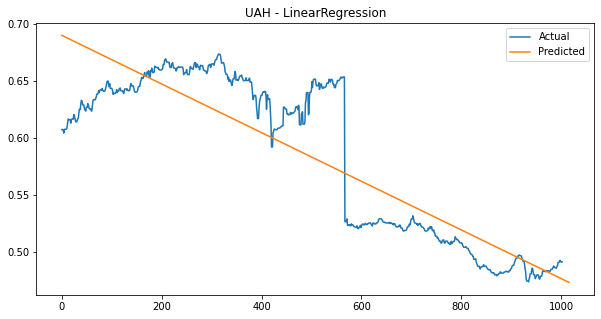

----------------------------------------------------
SVR
MAE: 0.06906704885343967
MSE: 0.005082706408275175
R^2: -0.017612083518566246


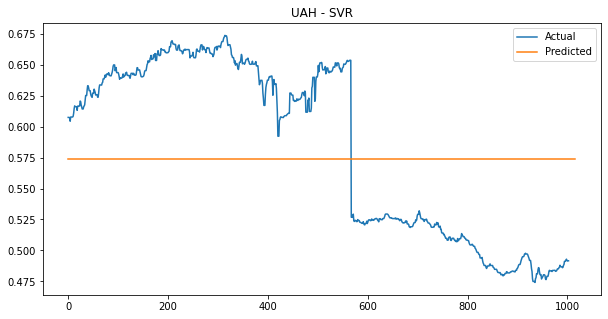

----------------------------------------------------
RandomForest
MAE: 0.0003679002991027064
MSE: 1.5178812263210634e-06
R^2: 0.9996961039743049


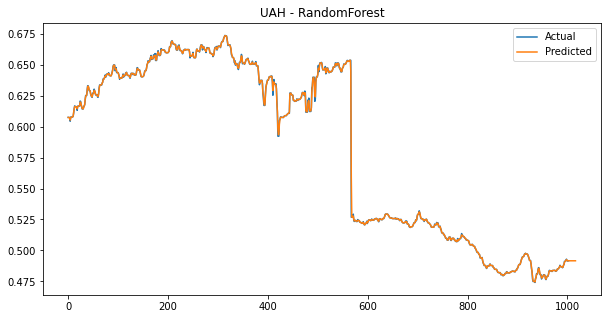

----------------------------------------------------
GradientBoosting
MAE: 0.0014541170730545442
MSE: 5.274885339354148e-06
R^2: 0.9989439116428676


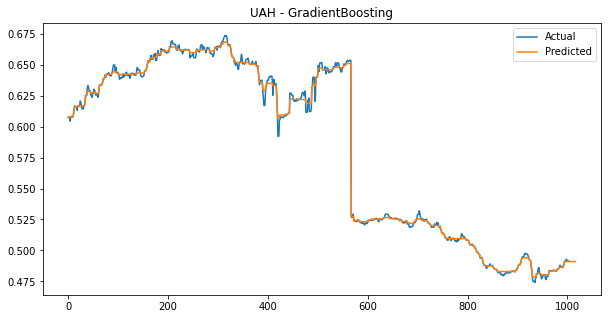

----------------------------------------------------
Currency: USD
ARIMA
MAE: 0.06718976300084734
MSE: 0.009997984443317431
R^2: -0.3666857308175351
----------------------------------------------------
LinearRegression
MAE: 0.5108697501650483
MSE: 0.3680821069170954
R^2: 0.19935641550541527


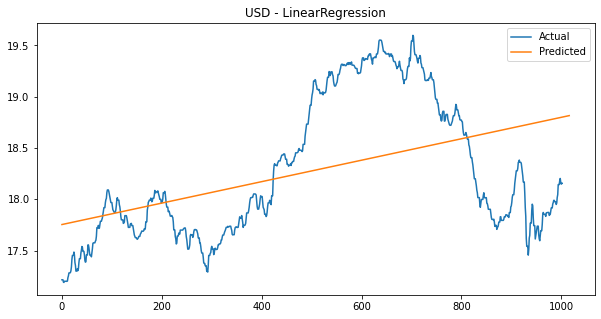

----------------------------------------------------
SVR
MAE: 0.11569082521366285
MSE: 0.021671298439897062
R^2: 0.9528610988214129


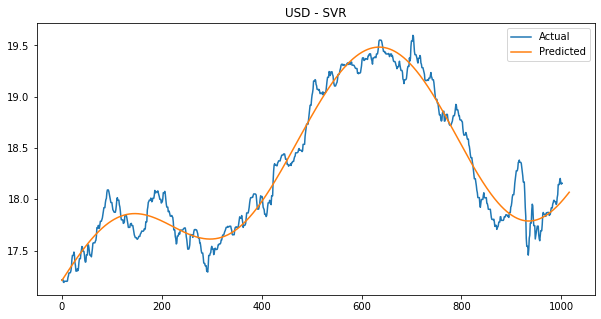

----------------------------------------------------
RandomForest
MAE: 0.005420630109670973
MSE: 6.548896447655982e-05
R^2: 0.9998575499371526


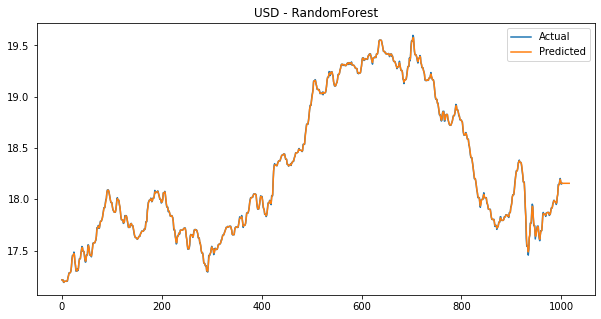

----------------------------------------------------
GradientBoosting
MAE: 0.027811319764138188
MSE: 0.001648546044399717
R^2: 0.9964141212262463


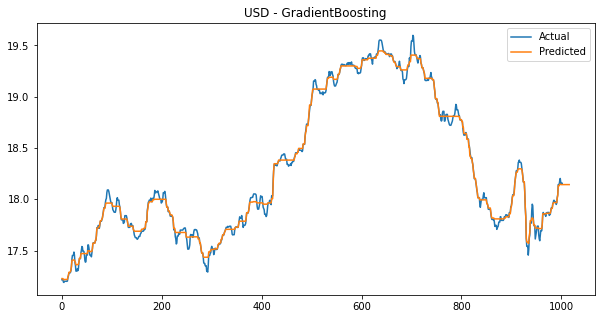

----------------------------------------------------


In [63]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np



# Define the models in a list
models = [
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Currencies you are interested in
currencies = ["EUR", "RON", "RUB", "UAH", "USD"]

# Loop through each currency
for currency in currencies:
    y = df[currency].values
    X = np.arange(len(y)).reshape(-1, 1)

    print(f"Currency: {currency}")
    
    # ARIMA Model
    def arima_model(X, y):
        model = ARIMA(y, order=(5,1,0))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(y)+14)
        return predictions[-14:]

    # ARIMA Evaluation and Prediction
    y_pred_arima = arima_model(X, y)
    print("ARIMA")
    print("MAE:", mean_absolute_error(y[-len(y_pred_arima):], y_pred_arima))
    print("MSE:", mean_squared_error(y[-len(y_pred_arima):], y_pred_arima))
    print("R^2:", r2_score(y[-len(y_pred_arima):], y_pred_arima))
    print("----------------------------------------------------")

    # Loop through other models, train, evaluate and predict
    for name, model in models:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name, model)
        ])
        
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)

        print(name)
        print("MAE:", mean_absolute_error(y, y_pred))
        print("MSE:", mean_squared_error(y, y_pred))
        print("R^2:", r2_score(y, y_pred))

        # Future prediction for next 14 days
        future_X = np.arange(len(y), len(y) + 14).reshape(-1, 1)
        future_y = pipeline.predict(future_X)

        # Plot the results
        plt.figure(figsize=(10, 5))
        plt.plot(X, y, label='Actual')
        plt.plot(np.concatenate([X, future_X]), np.concatenate([y_pred, future_y]), label='Predicted')
        plt.title(f"{currency} - {name}")
        plt.legend()
        plt.show()

        print("----------------------------------------------------")


Predicting for EUR
ARIMA
MAE: 0.12236360445861709
MSE: 0.020256608871975838
R^2: -1.5037154198840206


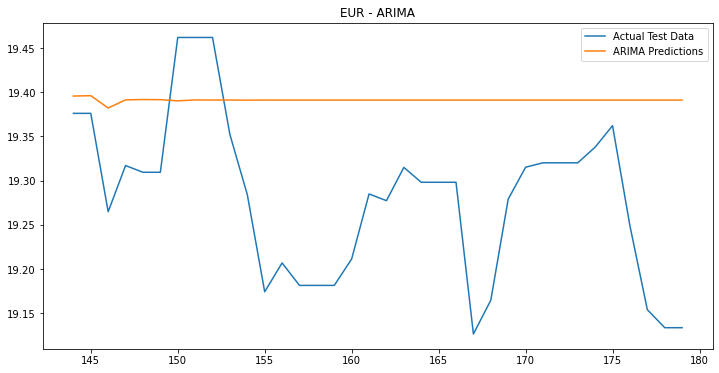

----------------------------------------------------
LinearRegression
MAE: 0.2329372804637896
MSE: 0.06174407552514564
R^2: -6.631563355733193


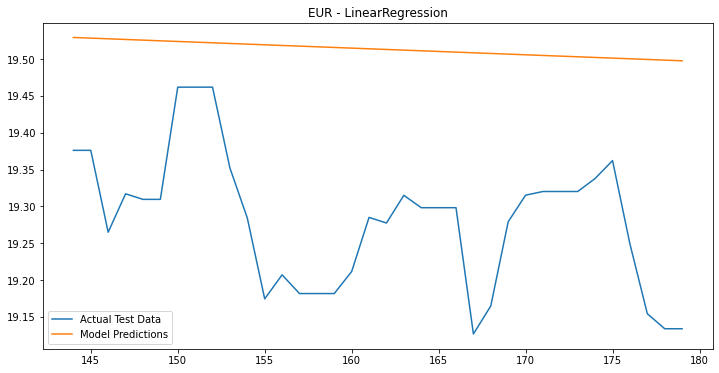

----------------------------------------------------
SVR
MAE: 0.26450068930022064
MSE: 0.09216475648295853
R^2: -10.39155736454377


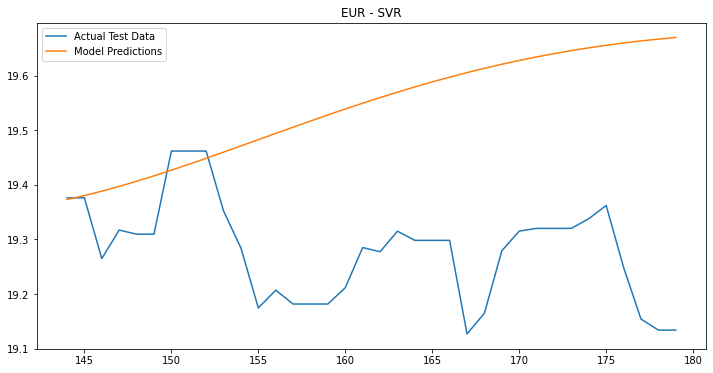

----------------------------------------------------
RandomForest
MAE: 0.10369272222220695
MSE: 0.0156681672745519
R^2: -0.9365843638758771


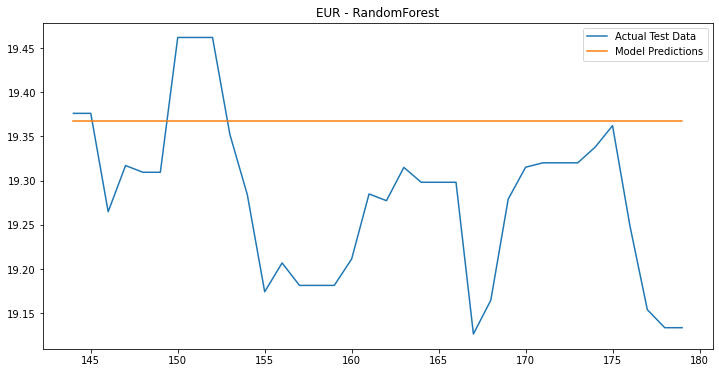

----------------------------------------------------
GradientBoosting
MAE: 0.0989284334943158
MSE: 0.014548016124868196
R^2: -0.7981337612212609


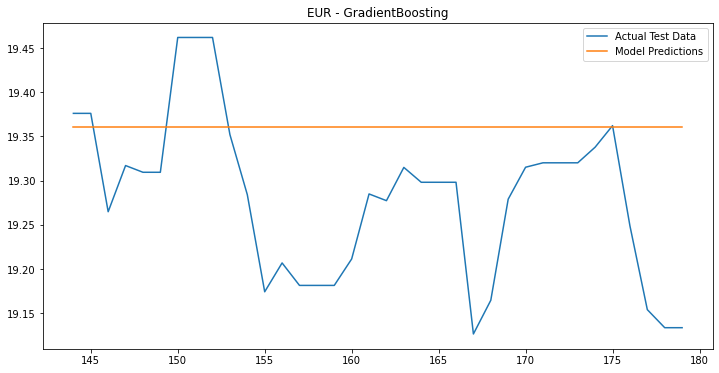

----------------------------------------------------
Predicting for RON
ARIMA
MAE: 0.042655720509343534
MSE: 0.002333358158861665
R^2: -2.6513370227842503


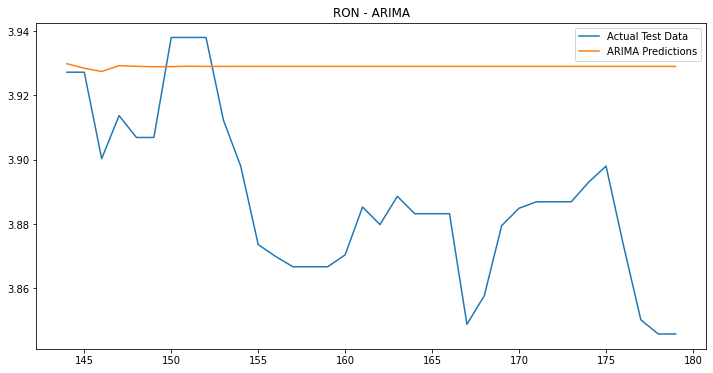

----------------------------------------------------
LinearRegression
MAE: 0.05648744272968419
MSE: 0.0037638966061473386
R^2: -4.889903774850601


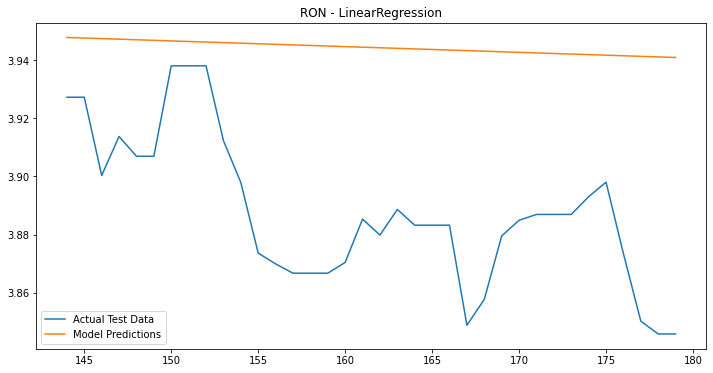

----------------------------------------------------
SVR
MAE: 0.06956695815939479
MSE: 0.005369045612780235
R^2: -7.401708476904284


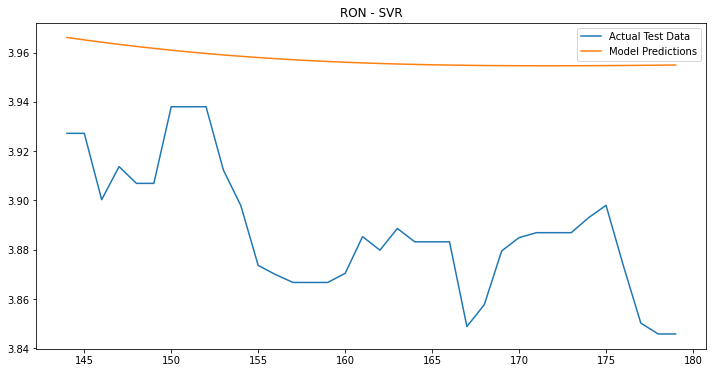

----------------------------------------------------
RandomForest
MAE: 0.03784027777778017
MSE: 0.0018469907638891164
R^2: -1.8902488592745512


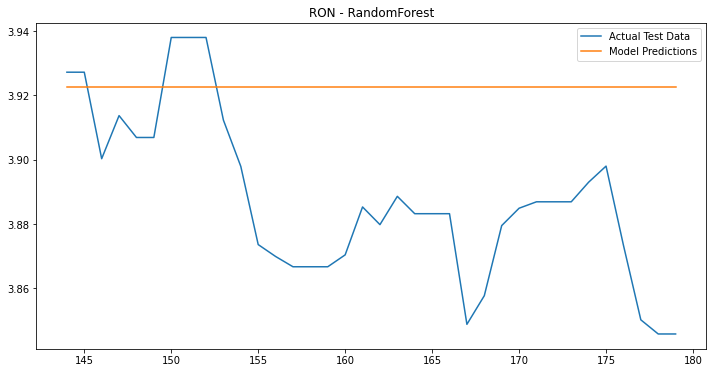

----------------------------------------------------
GradientBoosting
MAE: 0.03891702149674619
MSE: 0.0019528459165221769
R^2: -2.055895455959105


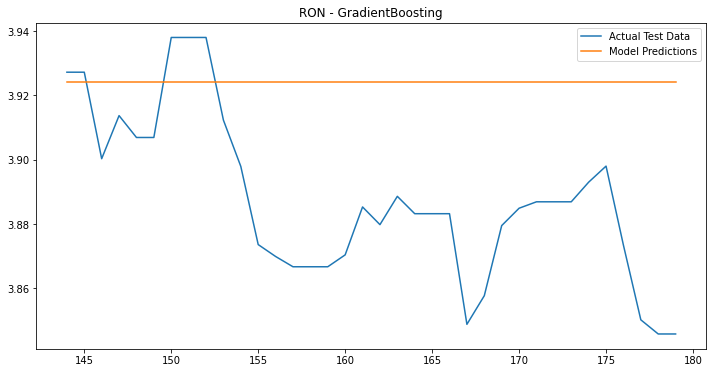

----------------------------------------------------
Predicting for RUB
ARIMA
MAE: 0.0021092902669629585
MSE: 7.915506269090967e-06
R^2: -0.711794949087813


C:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


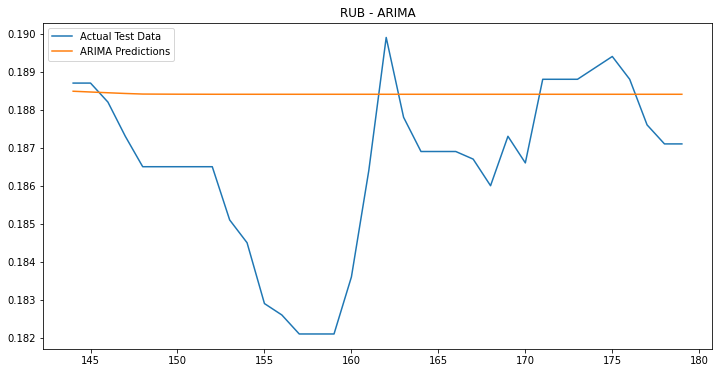

----------------------------------------------------
LinearRegression
MAE: 0.005552982019576853
MSE: 5.0468679213601105e-05
R^2: -9.914277271477282


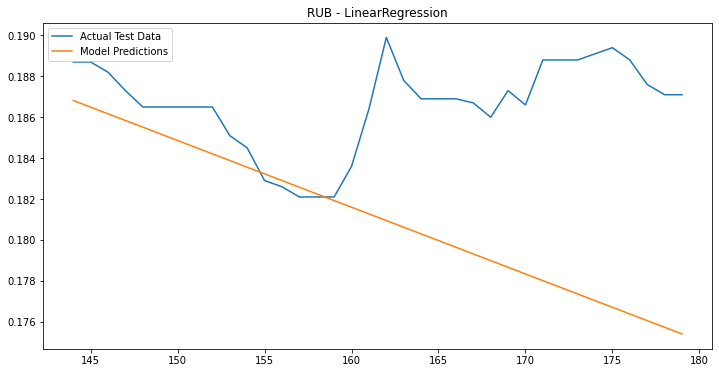

----------------------------------------------------
SVR
MAE: 0.01845833333333334
MSE: 0.0003453341666666669
R^2: -73.68142430204118


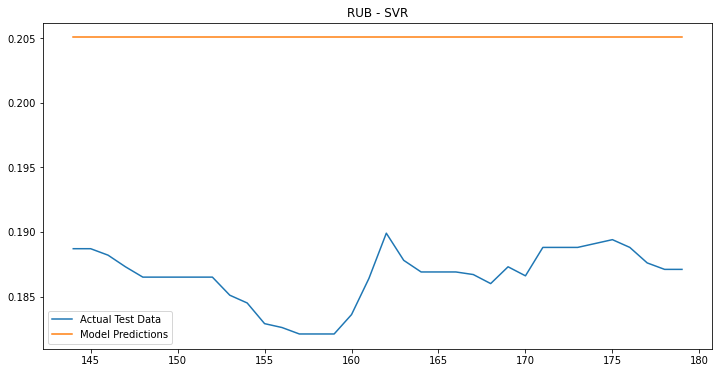

----------------------------------------------------
RandomForest
MAE: 0.0023661111111113156
MSE: 9.751302666667762e-06
R^2: -1.1088013936656727


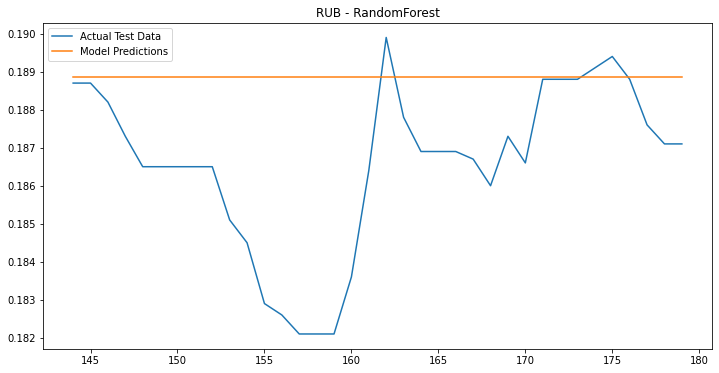

----------------------------------------------------
GradientBoosting
MAE: 0.002420469707700709
MSE: 1.0050964018086556e-05
R^2: -1.1736056867023108


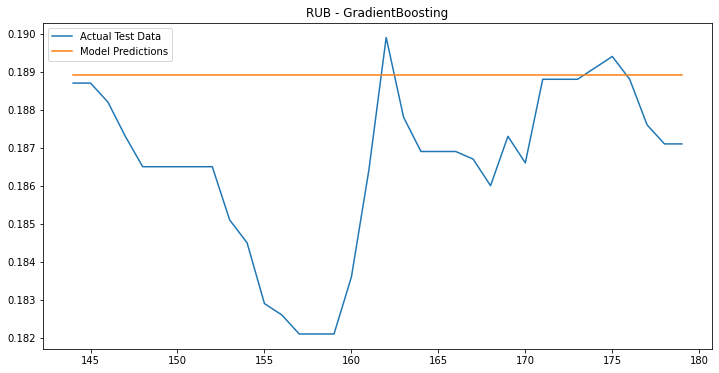

----------------------------------------------------
Predicting for UAH
ARIMA
MAE: 0.0028594155112988593
MSE: 1.5570664624754132e-05
R^2: -0.5184719666562305


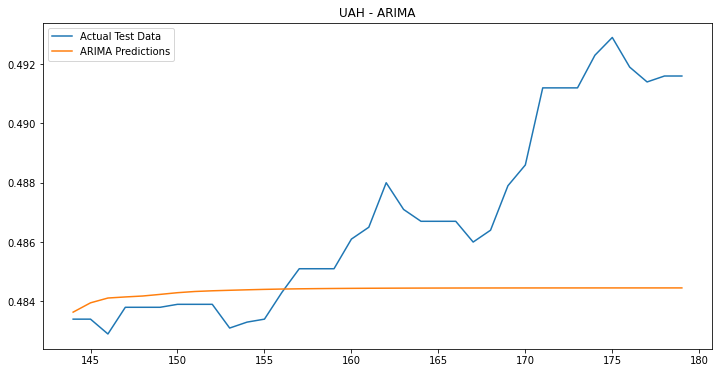

----------------------------------------------------
LinearRegression
MAE: 0.0057147447619430225
MSE: 4.601923624215437e-05
R^2: -3.487857252384


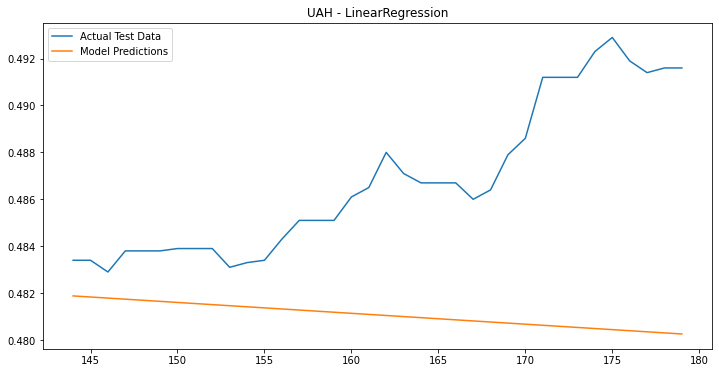

----------------------------------------------------
SVR
MAE: 0.0026722222222222256
MSE: 1.1034444444444472e-05
R^2: -0.07609372883651644


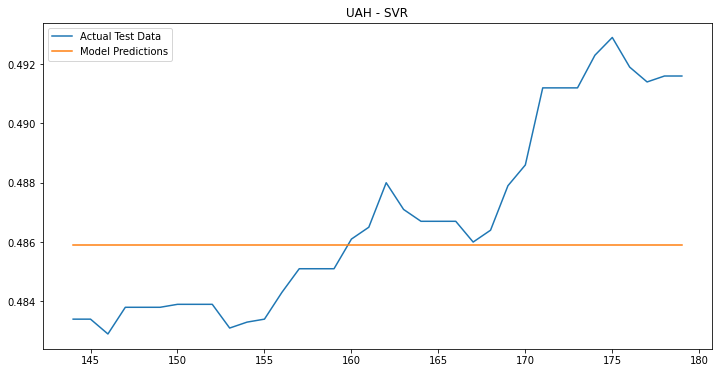

----------------------------------------------------
RandomForest
MAE: 0.0033993333333330244
MSE: 2.1358612111108038e-05
R^2: -1.0829203196529527


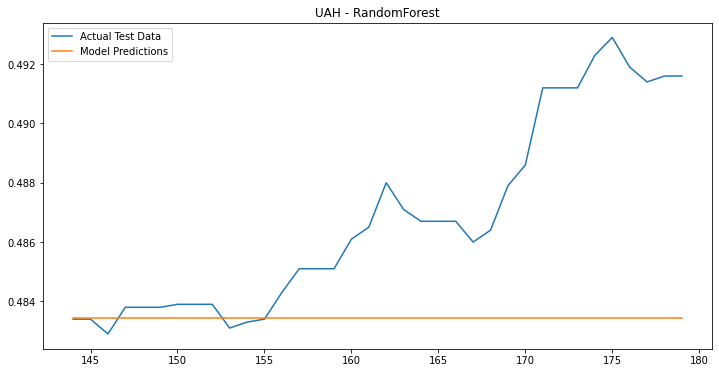

----------------------------------------------------
GradientBoosting
MAE: 0.0034488316846674858
MSE: 2.1827303610351913e-05
R^2: -1.1286277393272846


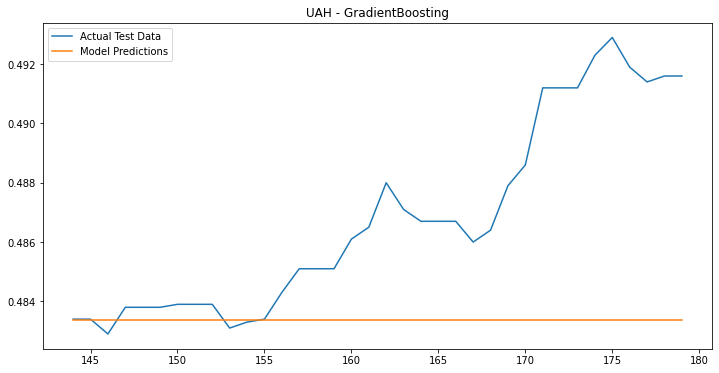

----------------------------------------------------
Predicting for USD
ARIMA
MAE: 0.11893692953286106
MSE: 0.026844797528145205
R^2: -0.9199803322745224


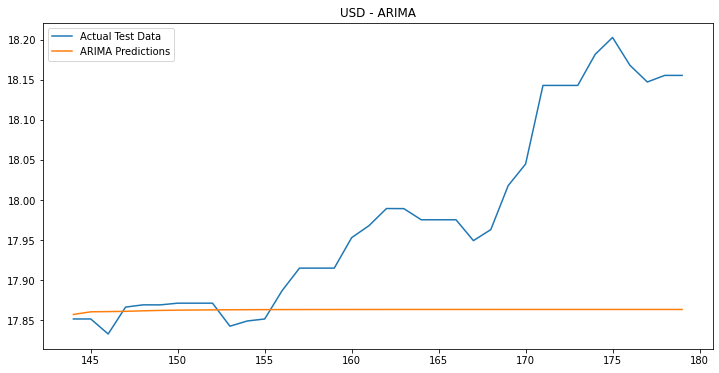

----------------------------------------------------
LinearRegression
MAE: 0.20815418726388518
MSE: 0.06139765286163593
R^2: -3.391252562756968


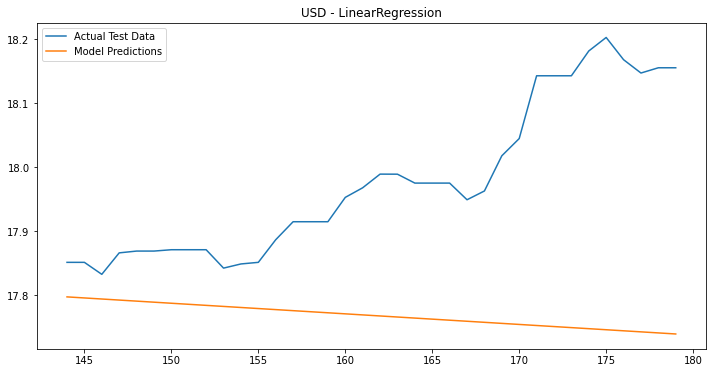

----------------------------------------------------
SVR
MAE: 0.0714255235798657
MSE: 0.007710487979823492
R^2: 0.44853429205494644


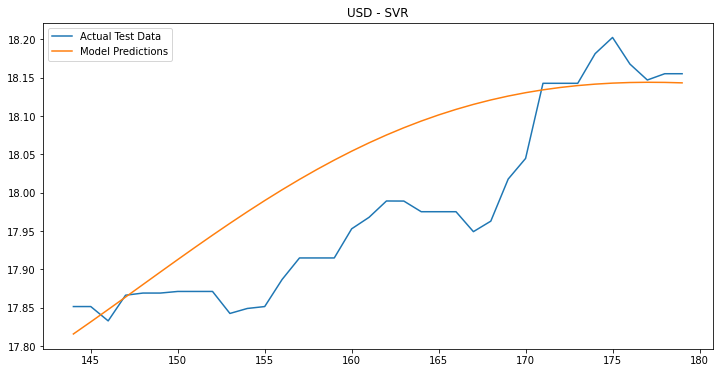

----------------------------------------------------
RandomForest
MAE: 0.1259272222222353
MSE: 0.029289134344449314
R^2: -1.0948029811634923


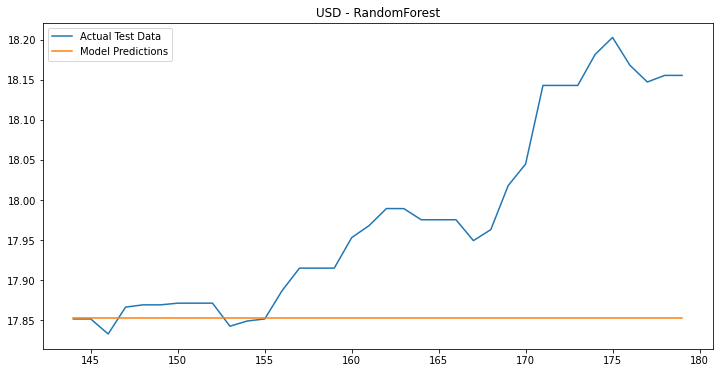

----------------------------------------------------
GradientBoosting
MAE: 0.1275092375587972
MSE: 0.0298419859854949
R^2: -1.1343437628125375


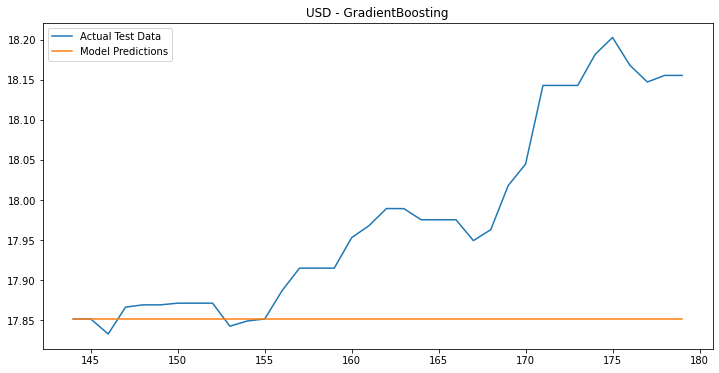

----------------------------------------------------


In [67]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# Assume df is your DataFrame
# df = ...

# Filter the last 6 months (about 180 days)
df_last_6_months = df.tail(180)

# Currencies to be considered
currencies = ["EUR", "RON", "RUB", "UAH", "USD"]

# Define your models
models = [
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Loop over each currency
for currency in currencies:
    print(f"Predicting for {currency}")
    y = df_last_6_months[currency].values
    X = np.arange(len(y)).reshape(-1, 1)
    
    # Create a train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # ARIMA model
    def arima_model(y):
        model = ARIMA(y, order=(5,1,0))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(X_test))
        return predictions
    
    # Train and predict using ARIMA
    y_pred_arima = arima_model(y_train)

    print("ARIMA")
    print("MAE:", mean_absolute_error(y_test, y_pred_arima))
    print("MSE:", mean_squared_error(y_test, y_pred_arima))
    print("R^2:", r2_score(y_test, y_pred_arima))

    # Plot ARIMA
    plt.figure(figsize=(12, 6))
    plt.plot(X_test, y_test, label="Actual Test Data")
    plt.plot(X_test, y_pred_arima, label="ARIMA Predictions")
    plt.title(f"{currency} - ARIMA")
    plt.legend()
    plt.show()

    print("----------------------------------------------------")
    
    # Loop over the other models
    for name, model in models:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name, model)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        print(name)
        print("MAE:", mean_absolute_error(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))
        print("R^2:", r2_score(y_test, y_pred))
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(X_test, y_test, label="Actual Test Data")
        plt.plot(X_test, y_pred, label="Model Predictions")
        plt.title(f"{currency} - {name}")
        plt.legend()
        plt.show()

        print("----------------------------------------------------")


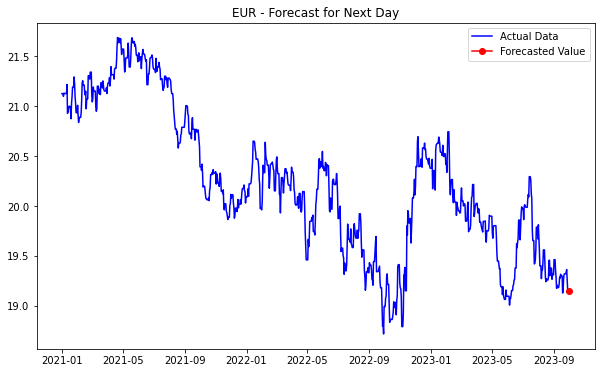

Forecasted EUR for next day: 19.14386995372335


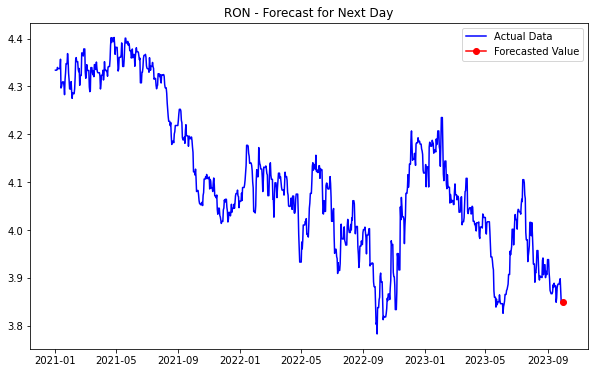

Forecasted RON for next day: 3.8486363661144147


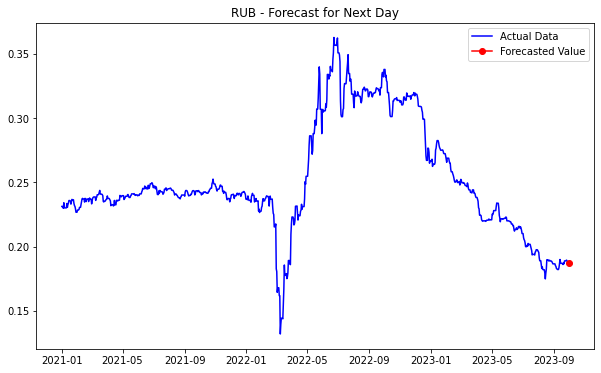

Forecasted RUB for next day: 0.18707905113205747


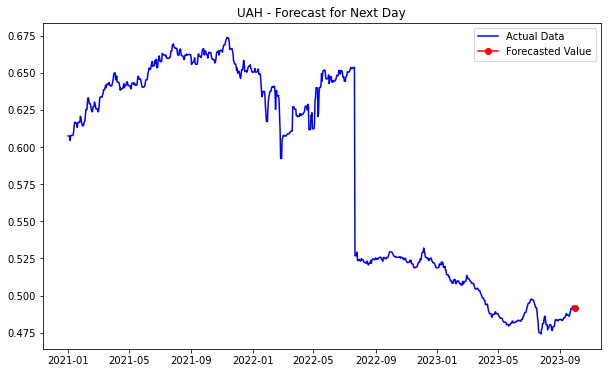

Forecasted UAH for next day: 0.4916516559368844


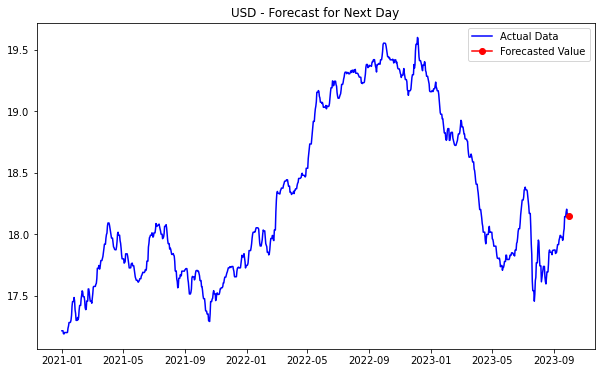

Forecasted USD for next day: 18.151257787020793


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def forecast_next_day(currency):
    # Prepare the data
    data = df[currency].dropna()
    
    # Set the frequency for the time series data
    data = data.asfreq('D', method='pad')
    
    # Fit the ARIMA model on the entire dataset
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast the next day's value
    forecast = model_fit.forecast(steps=1)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values, label='Actual Data', color='blue')
    plt.plot(data.index[-1] + pd.DateOffset(days=1), forecast, label='Forecasted Value', color='red', marker='o')
    plt.title(f"{currency} - Forecast for Next Day")
    plt.legend()
    plt.show()
    
    print(f"Forecasted {currency} for next day: {forecast[0]}")
    
currencies = ['EUR', 'RON', 'RUB', 'UAH', 'USD']

for currency in currencies:
    forecast_next_day(currency)


Next day forecast for EUR: 19.21
Mean Absolute Error for EUR: 0.07


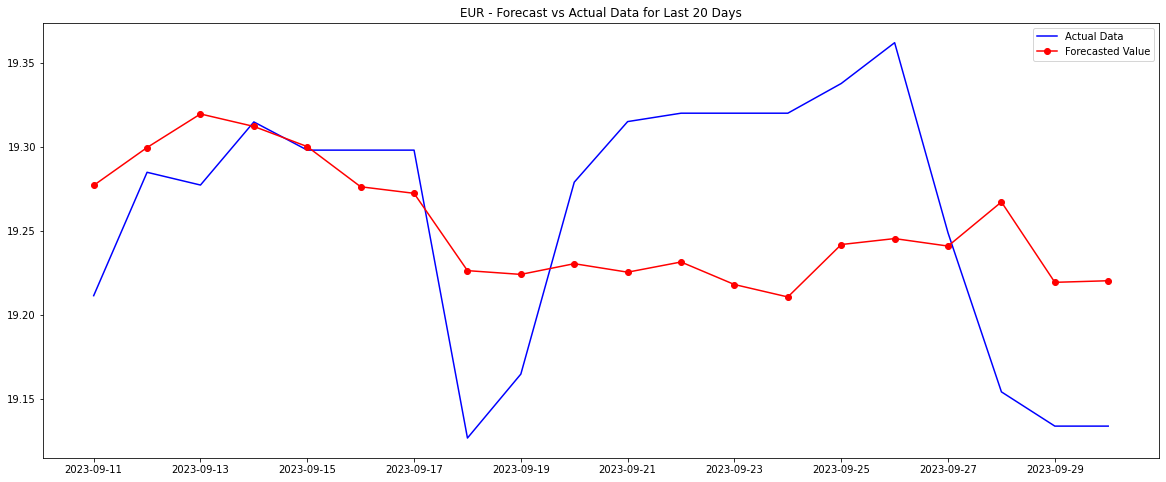

Next day forecast for RON: 3.88
Mean Absolute Error for RON: 0.02


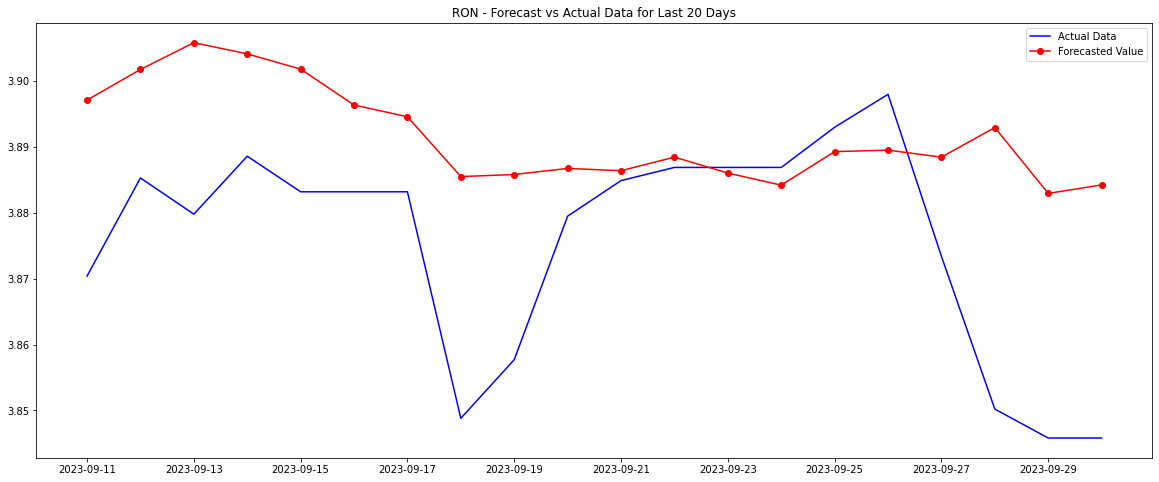

Next day forecast for RUB: 0.19
Mean Absolute Error for RUB: 0.00


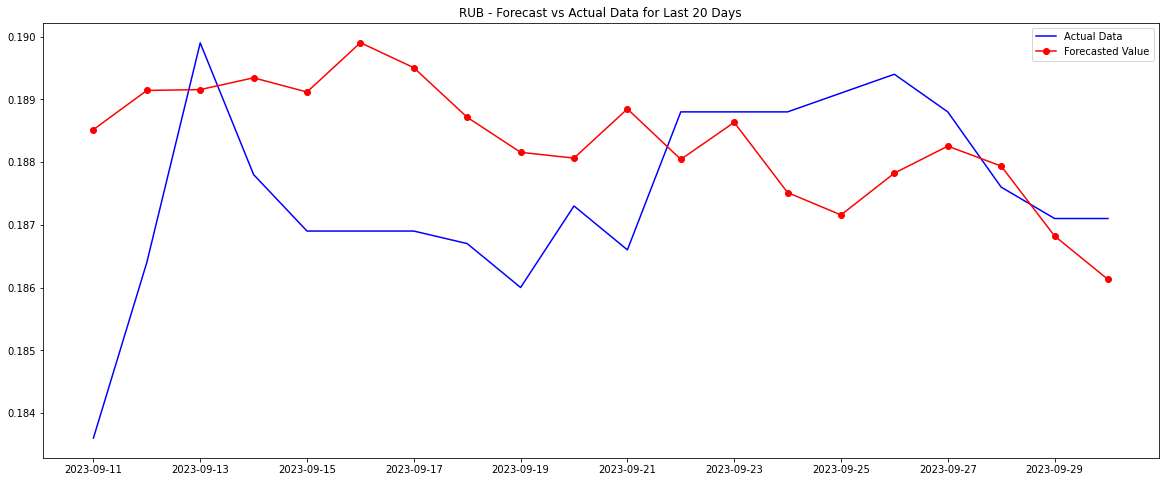

Next day forecast for UAH: 0.48
Mean Absolute Error for UAH: 0.01


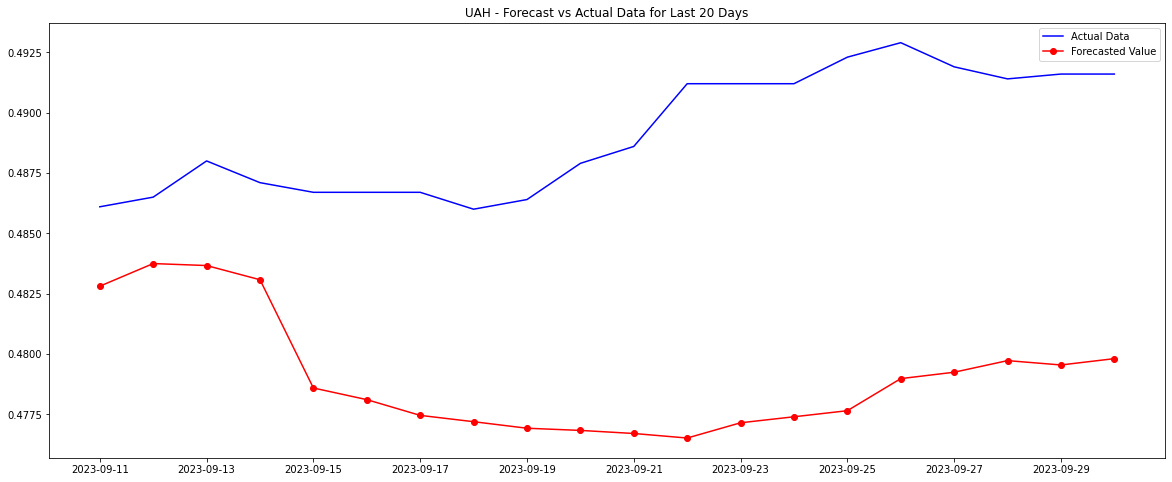

Next day forecast for USD: 18.87
Mean Absolute Error for USD: 0.36


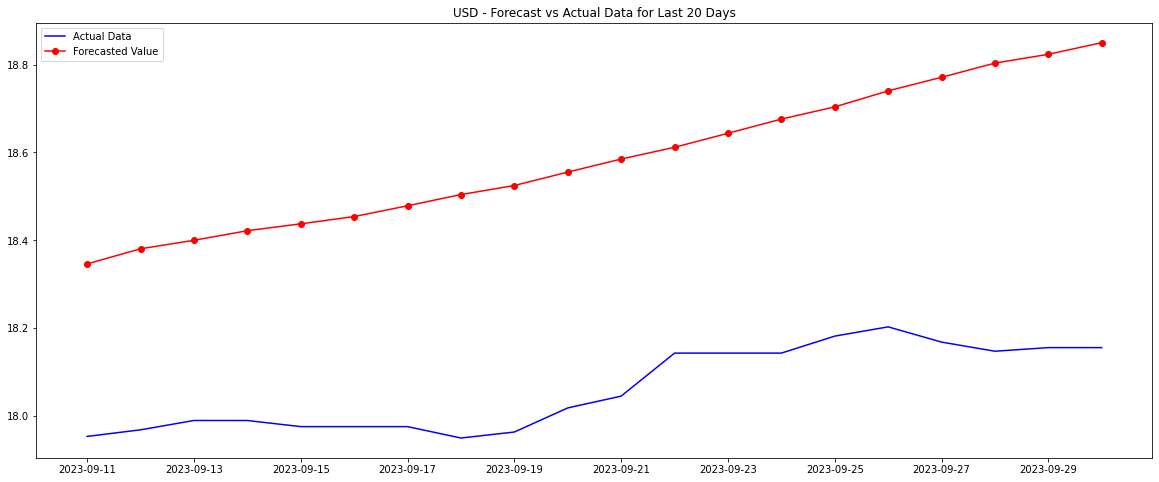

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Assuming 'df' is your DataFrame and it's already loaded

def forecast_next_day(currency, plot_days=20):
    # Prepare the data
    data = df[currency].dropna()
    
    # Set the frequency for the time series data
    data = data.asfreq('D', method='pad')
    
    # Split data into training and validation sets
    train, validation = data[:-40], data[-40:]
    
    # Train the ExponentialSmoothing model
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30).fit()
    
    # Generate forecast for the validation period plus the next day
    forecast = model.forecast(len(validation) + 1)
    
    # Extract the forecast for the next day
    next_day_forecast = forecast[-1]
    print(f"Next day forecast for {currency}: {next_day_forecast:.2f}")
    
    # Ensure consistent lengths for validation and forecast
    assert len(validation) == len(forecast[:-1]), "Validation and Forecast lengths are inconsistent!"
    
    # Calculate Mean Absolute Error on the validation set
    mae = mean_absolute_error(validation, forecast[:-1])
    print(f"Mean Absolute Error for {currency}: {mae:.2f}")
    
    # Plotting the last 'plot_days' days for clearer visualization
    plt.figure(figsize=(20, 8))
    plt.plot(data.index[-plot_days:], data.values[-plot_days:], label='Actual Data', color='blue')
    plt.plot(data.index[-plot_days:], forecast[-plot_days-1:-1], label='Forecasted Value', color='red', marker='o')
    plt.title(f'{currency} - Forecast vs Actual Data for Last {plot_days} Days')
    plt.legend()
    plt.show()

currencies = ['EUR', 'RON', 'RUB', 'UAH', 'USD']

for currency in currencies:
    forecast_next_day(currency)


Next day forecast for EUR: 19.24
Mean Absolute Error for EUR: 0.08
Mean Squared Error for EUR: 0.01


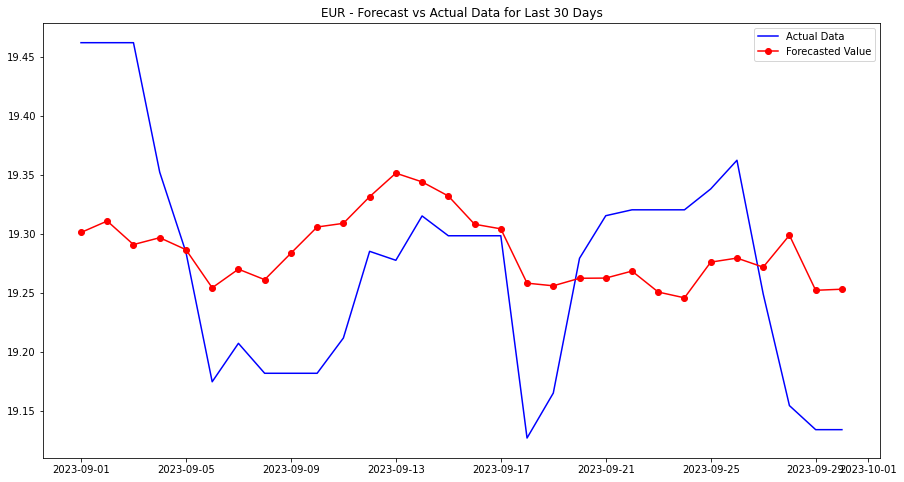

Next day forecast for RON: 3.89
Mean Absolute Error for RON: 0.03
Mean Squared Error for RON: 0.00


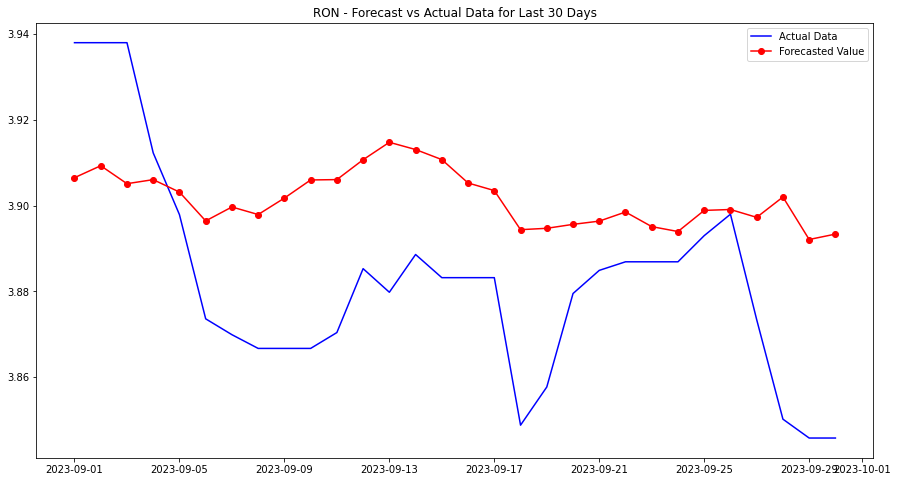

Next day forecast for RUB: 0.18
Mean Absolute Error for RUB: 0.00
Mean Squared Error for RUB: 0.00


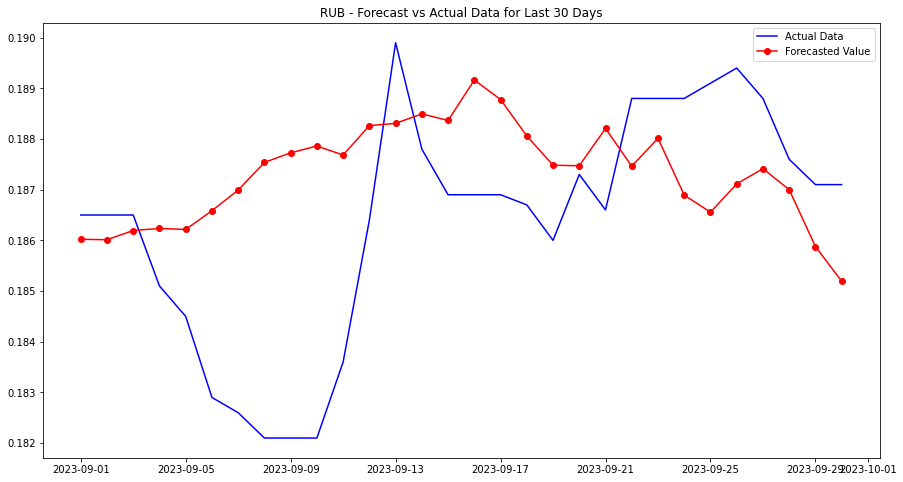

Next day forecast for UAH: 0.48
Mean Absolute Error for UAH: 0.01
Mean Squared Error for UAH: 0.00


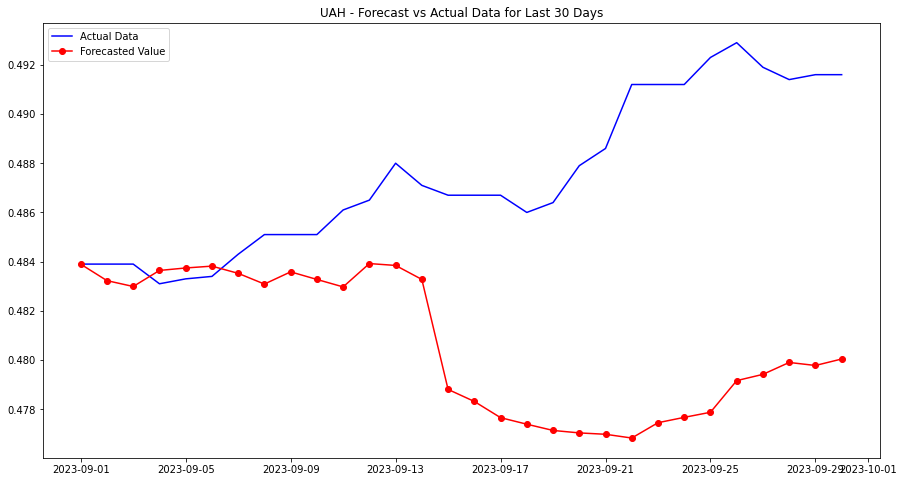

Next day forecast for USD: 18.00
Mean Absolute Error for USD: 0.08
Mean Squared Error for USD: 0.01


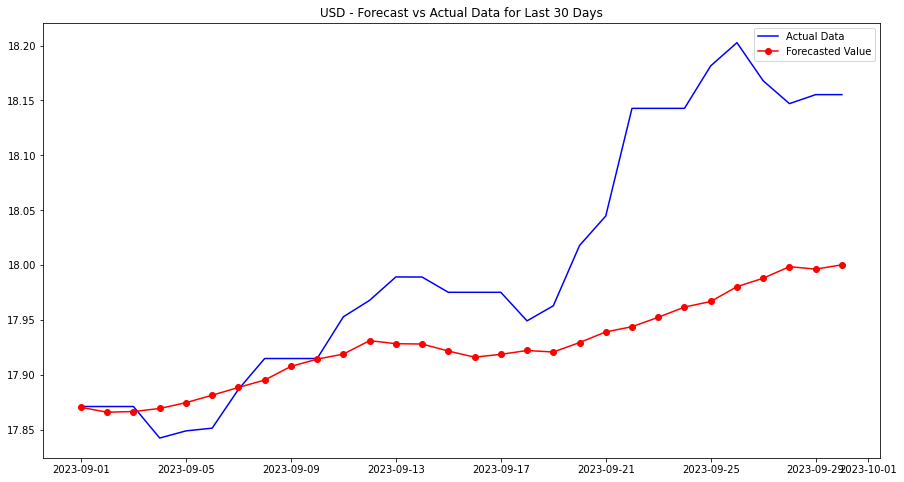

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and it's already loaded

def forecast_next_day(currency, plot_days=30):
    # Prepare the data
    data = df[currency].dropna()
    
    # Set the frequency for the time series data
    data = data.asfreq('D', method='pad')
    
    # Split data into training and validation sets
    train, validation = data[:-30], data[-30:]
    
    # Train the ExponentialSmoothing model
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30).fit()
    
    # Generate forecast for the validation period plus the next day
    forecast = model.forecast(len(validation) + 1)
    
    # Extract the forecast for the next day
    next_day_forecast = forecast[-1]
    print(f"Next day forecast for {currency}: {next_day_forecast:.2f}")
    
    # Ensure consistent lengths for validation and forecast
    assert len(validation) == len(forecast[:-1]), "Validation and Forecast lengths are inconsistent!"
    
    # Calculate Mean Absolute Error on the validation set
    mae = mean_absolute_error(validation, forecast[:-1])
    print(f"Mean Absolute Error for {currency}: {mae:.2f}")
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(validation, forecast[:-1])
    print(f"Mean Squared Error for {currency}: {mse:.2f}")
    
    # Calculate R-squared
#     r2 = r2_score(validation, forecast[:-1])
#     print(f"R-squared for {currency}: {r2:.2f}")
    
    # Plotting the last 'plot_days' days for clearer visualization
    plt.figure(figsize=(15, 8))
    plt.plot(data.index[-plot_days:], data.values[-plot_days:], label='Actual Data', color='blue')
    plt.plot(data.index[-plot_days:], forecast[-plot_days-1:-1], label='Forecasted Value', color='red', marker='o')
    plt.title(f'{currency} - Forecast vs Actual Data for Last {plot_days} Days')
    plt.legend()
    plt.show()

currencies = ['EUR', 'RON', 'RUB', 'UAH', 'USD']

for currency in currencies:
    forecast_next_day(currency)


Next day forecast for EUR: 19.24
Mean Absolute Error for EUR: 0.08
Mean Squared Error for EUR: 0.01


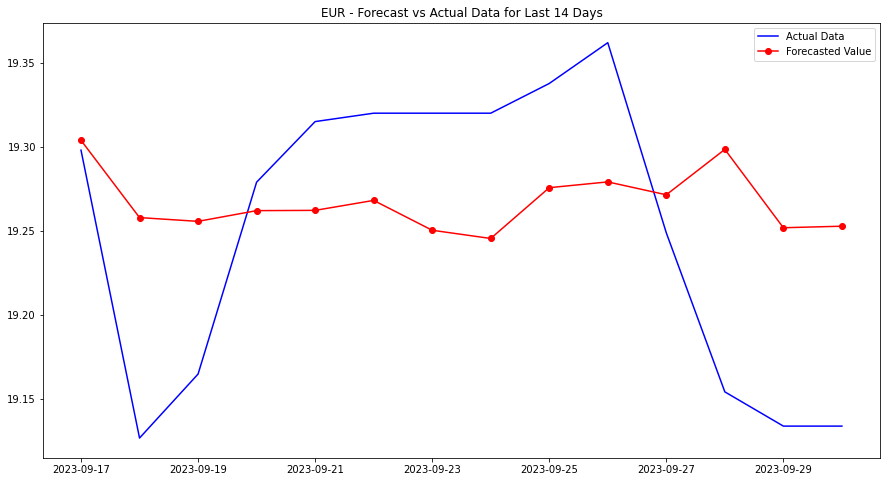

Next day forecast for RON: 3.89
Mean Absolute Error for RON: 0.03
Mean Squared Error for RON: 0.00


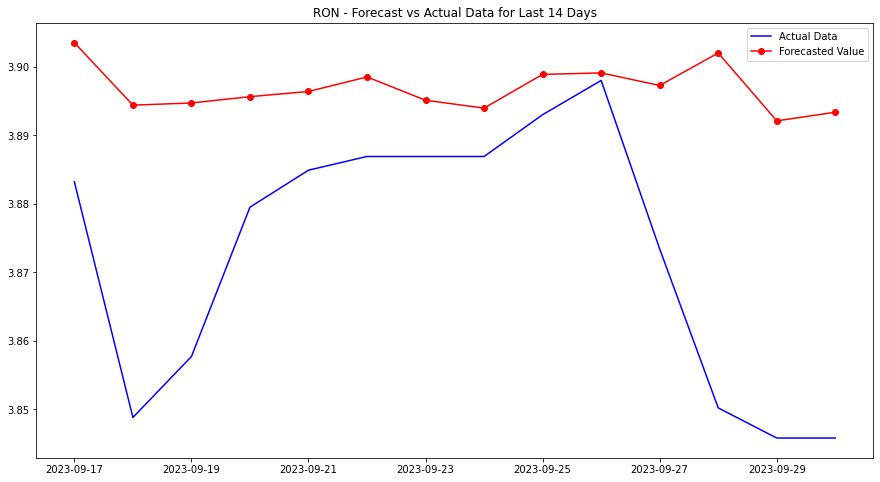

Next day forecast for RUB: 0.18
Mean Absolute Error for RUB: 0.00
Mean Squared Error for RUB: 0.00


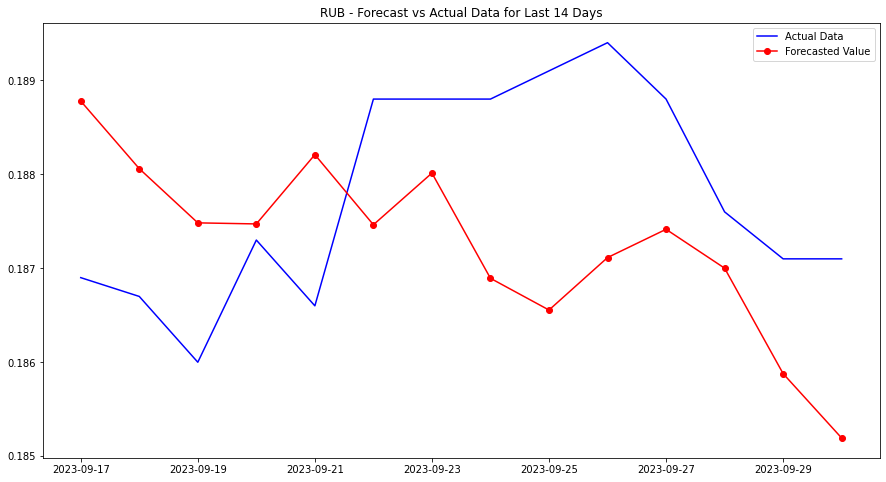

Next day forecast for UAH: 0.48
Mean Absolute Error for UAH: 0.01
Mean Squared Error for UAH: 0.00


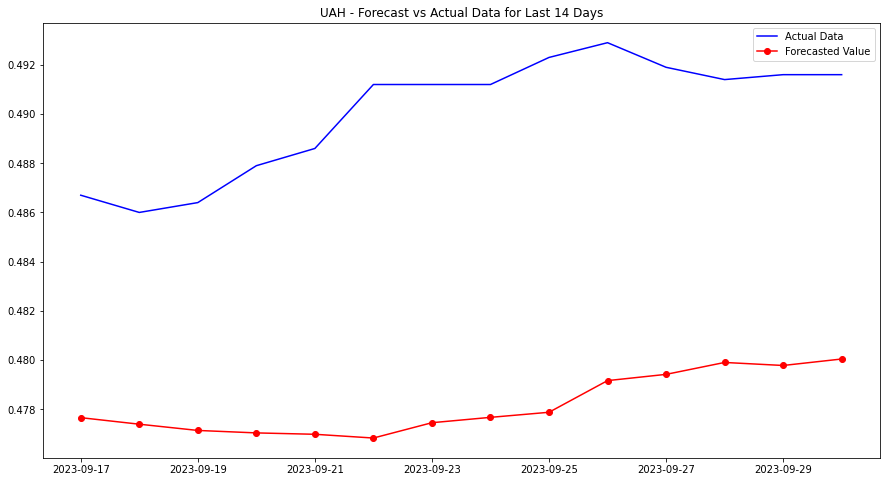

Next day forecast for USD: 18.00
Mean Absolute Error for USD: 0.08
Mean Squared Error for USD: 0.01


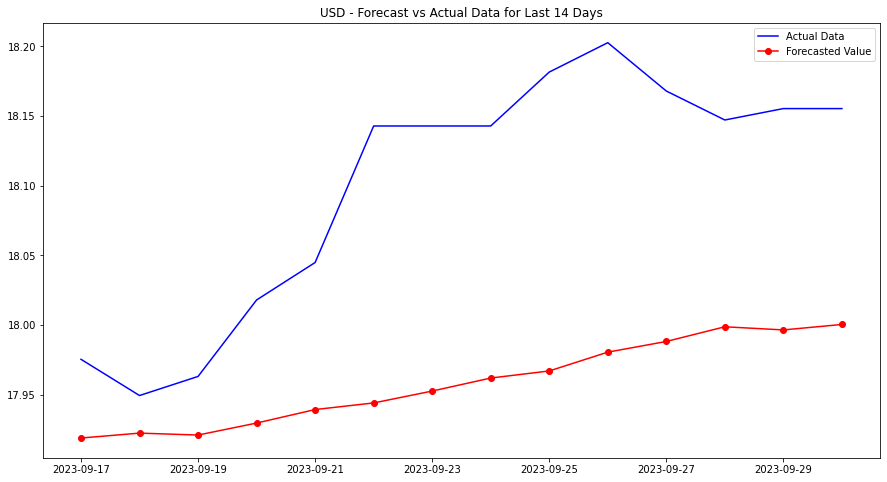

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and it's already loaded

def forecast_next_day(currency, plot_days=14):
    # Prepare the data
    data = df[currency].dropna()
    
    # Set the frequency for the time series data
    data = data.asfreq('D', method='pad')
    
    # Split data into training and validation sets
    train, validation = data[:-30], data[-30:]
    
    # Train the ExponentialSmoothing model
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30).fit()
    
    # Generate forecast for the validation period plus the next day
    forecast = model.forecast(len(validation) + 1)
    
    # Extract the forecast for the next day
    next_day_forecast = forecast[-1]
    print(f"Next day forecast for {currency}: {next_day_forecast:.2f}")
    
    # Ensure consistent lengths for validation and forecast
    assert len(validation) == len(forecast[:-1]), "Validation and Forecast lengths are inconsistent!"
    
    # Calculate Mean Absolute Error on the validation set
    mae = mean_absolute_error(validation, forecast[:-1])
    print(f"Mean Absolute Error for {currency}: {mae:.2f}")
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(validation, forecast[:-1])
    print(f"Mean Squared Error for {currency}: {mse:.2f}")
    
    # Calculate R-squared
#     r2 = r2_score(validation, forecast[:-1])
#     print(f"R-squared for {currency}: {r2:.2f}")
    
    # Plotting the last 'plot_days' days for clearer visualization
    plt.figure(figsize=(15, 8))
    plt.plot(data.index[-plot_days:], data.values[-plot_days:], label='Actual Data', color='blue')
    plt.plot(data.index[-plot_days:], forecast[-plot_days-1:-1], label='Forecasted Value', color='red', marker='o')
    plt.title(f'{currency} - Forecast vs Actual Data for Last {plot_days} Days')
    plt.legend()
    plt.show()

currencies = ['EUR', 'RON', 'RUB', 'UAH', 'USD']

for currency in currencies:
    forecast_next_day(currency)
